In [ ]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context


import pandas as pd

column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names=column_names)

df.head()

## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

abalone_pca_data = df.drop(columns=['Sex'])

sc = StandardScaler()
abalone_std = sc.fit_transform(abalone_pca_data)

pca = PCA(n_components=2)
abalone_pca = pca.fit_transform(abalone_std)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])

pca_df = pd.DataFrame(data=abalone_pca, columns=['PC1', 'PC2'])
pca_df['Sex'] = df['Sex']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Sex', data=pca_df, palette='viridis')
plt.title('PCA on Abalone Dataset')
plt.show()


In [ ]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd

X, y = make_classification(n_samples=1000, n_features=7, n_informative=3, n_redundant=4, n_classes=3, random_state=42)


In [ ]:
pca_2d = PCA(n_components=2)
pca_2d.fit(X)

pca_2d_data = pca_2d.transform(X)

pca_2d_df = pd.DataFrame(data=pca_2d_data, columns=['PC1', 'PC2'])
pca_2d_df['target'] = y

fig = px.scatter(pca_2d_df, x='PC1', y='PC2', color='target')
fig.show()

In [ ]:

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

pca_df_3d = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['Class'] = y

fig = px.scatter_3d(pca_df_3d, x='PC1', y='PC2', z='PC3', color='Class', color_continuous_scale='viridis')
fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
print(X_pca_3d.shape)

X_original = pca_3d.inverse_transform(X_pca_3d)

X_original.shape

## Encoding DateTime features

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'datetime': pd.date_range(start='1/1/2022', periods=24, freq='H')
})

df['hour'] = df['datetime'].dt.hour

df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)

df.plot.scatter('hour_sin', 'hour_cos').set_aspect('equal')


## Outlier detection

In [ ]:
data = np.random.normal(0, 1, 1000)
outliers = np.random.uniform(low=-10, high=10, size=(10,))

data = np.concatenate((data, outliers))
label = np.concatenate((np.zeros(1000), np.ones(10)))

df = pd.DataFrame(data={'data': data, 'label': label})

df['data'].plot.hist(bins=50)

In [ ]:
from scipy.stats import zscore

z_scores = zscore(df['data'])
outliers = np.where(abs(z_scores) > 3)

print("Z-score method:")
print(df.iloc[outliers])

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.01)  # adjust contamination parameter as needed
outliers_pred = clf.fit_predict(df[['data']])

outliers = np.where(outliers_pred == -1)

print(df['data'].iloc[outliers])


## Binning

In [ ]:
x = np.linspace(0, 10, 100)

df = pd.DataFrame(data={'x': x})

df['quantile'] = pd.qcut(df['x'], q=4, labels=False)

## Feature Selection

In [ ]:
# Univariate selection

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

iris = load_iris()
X, y = iris.data, iris.target

selector = SelectKBest(score_func=chi2, k=2)
fit = selector.fit(X, y)

indices = np.argsort(fit.scores_)[::-1]

features = []
for i in range(2): 
    features.append(iris.feature_names[indices[i]])

print(features)

In [ ]:
# Multivariate selection

from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Create the RFE object and rank each feature
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
fit = rfe.fit(X, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("Selected Features: %s" % [iris.feature_names[i] for i in range(len(fit.support_)) if fit.support_[i]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X, y)

importance = clf.feature_importances_

importance_normalized = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

indices = np.argsort(importance_normalized)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, iris.feature_names[indices[f]], importance[indices[f]]))


## Handling large data

In [ ]:
!pip install dask[dataframe]

In [ ]:
# Data source: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [ ]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

df = dd.read_parquet('./yellow_tripdata_2023-04.parquet', npartitions=10)

df.apply(lambda x: x['passenger_count'] * x['trip_distance'], axis=1)


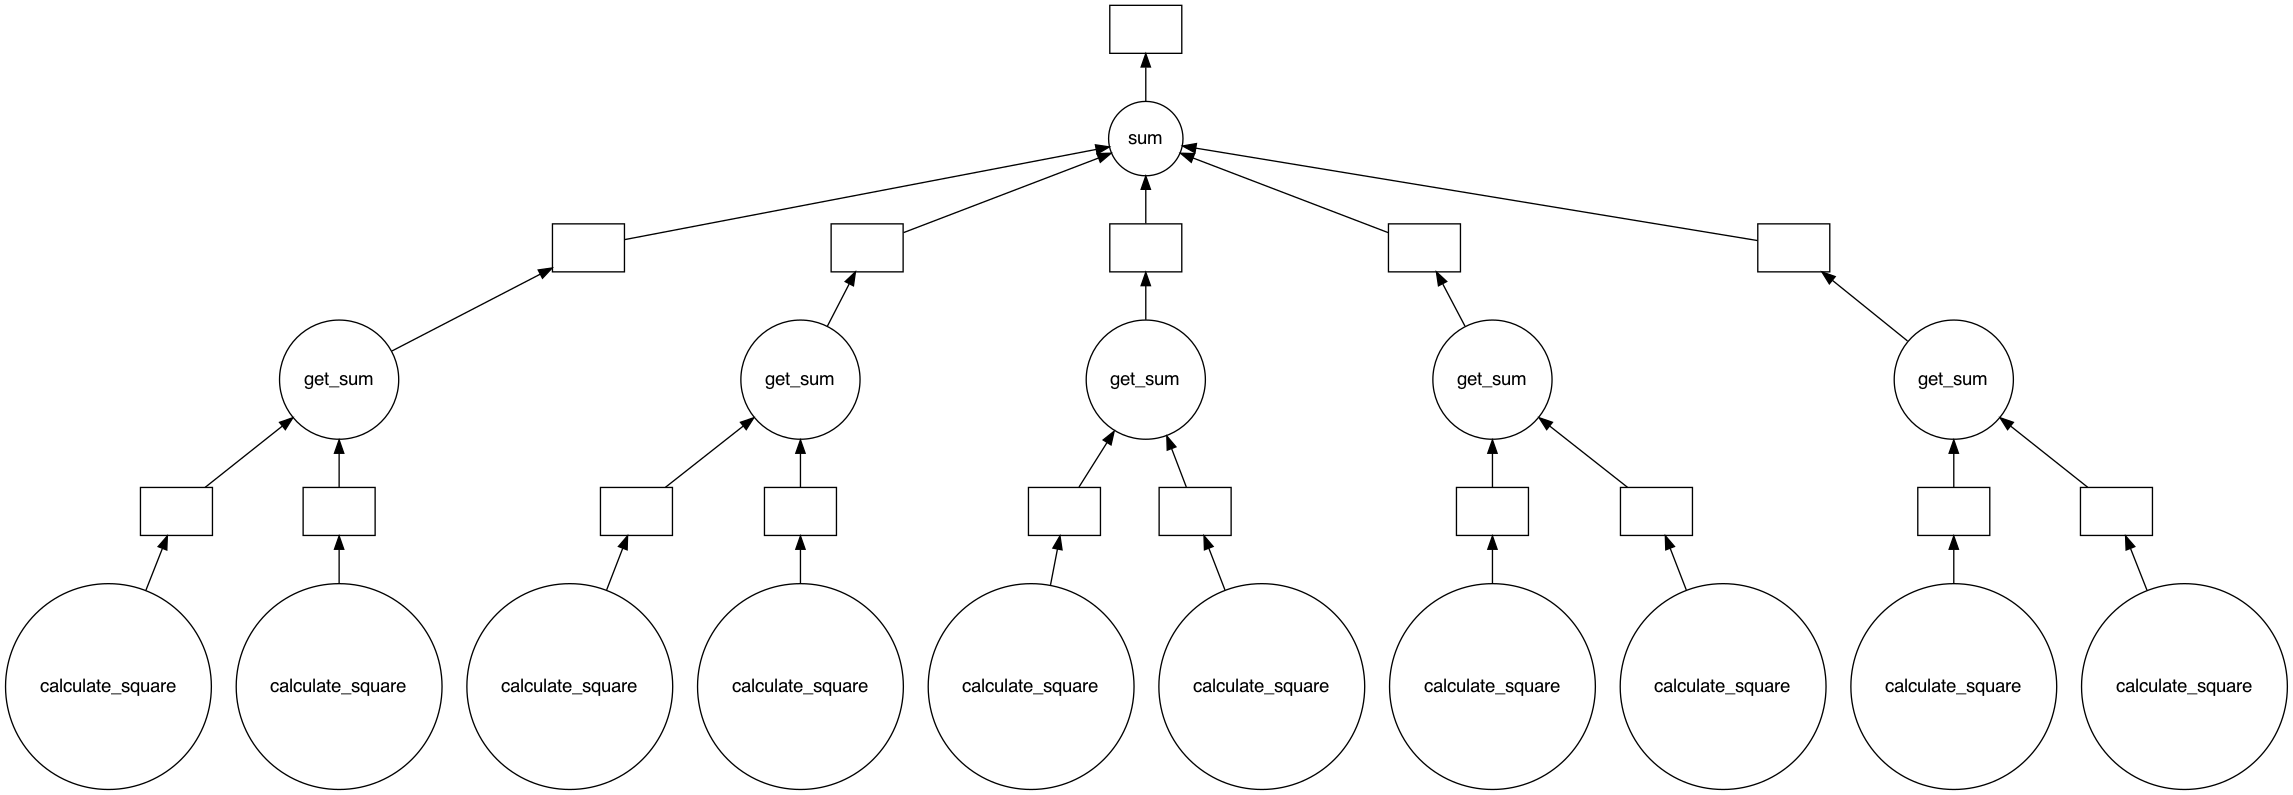